In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [12]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_year_of_arrival.csv")

In [13]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [14]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,GCC_CODE16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,tot_before_1946,tot_1946_1955,...,tot_2013,tot_2014,tot_2015,tot_2016,tot_tot,home_percent,established_percent,recent_percent,new_percent,Preferred Party
0,0,101021007,New South Wales,1RNSW,655,850,1505,101021007,0,29,...,8,4,13,4,460,0.434783,0.284783,0.154348,0.082609,ALP
1,1,101021008,New South Wales,1RNSW,600,937,1537,101021008,0,68,...,23,22,25,15,1322,0.403933,0.240545,0.225416,0.112708,ALP
2,2,101021009,New South Wales,1RNSW,7954,9937,17891,101021009,3,173,...,124,142,136,79,2680,0.274254,0.130224,0.303358,0.256343,ALP
3,3,101021010,New South Wales,1RNSW,756,1040,1796,101021010,0,50,...,46,90,75,40,1189,0.213625,0.155593,0.329689,0.277544,ALP
4,4,101021011,New South Wales,1RNSW,3023,3052,6075,101021011,0,126,...,38,30,30,22,2205,0.414966,0.246259,0.210884,0.097506,ALP


In [16]:
pdf = df[["STE_NAME16", "Preferred Party", "home_percent", "established_percent", "recent_percent", "new_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

In [37]:
df1 = df[["Preferred Party","home_percent"]]
df1.columns = ["Preferred Party", "Percent"]
df1.insert(0, "sort", 1)
df1["group"] = "Home"

df2 = df[["Preferred Party","established_percent"]]
df2.columns = ["Preferred Party", "Percent"]
df2.insert(0, "sort", 2)
df2["group"] = "Established"

df3 = df[["Preferred Party","recent_percent"]]
df3.columns = ["Preferred Party", "Percent"]
df3.insert(0, "sort", 3)
df3["group"] = "Recent"

df4 = df[["Preferred Party","new_percent"]]
df4.columns = ["Preferred Party", "Percent"]
df4.insert(0, "sort", 4)
df4["group"] = "New"

frames = [df1, df2, df3, df4]
ddf = pd.concat(frames)
df1.head()

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is 

,sort,Preferred Party,Percent,group
0,1,ALP,0.434783,Home
1,1,ALP,0.403933,Home
2,1,ALP,0.274254,Home
3,1,ALP,0.213625,Home
4,1,ALP,0.414966,Home


In [38]:
ddf = ddf.groupby(["Preferred Party", "group", "sort"]).median()
ddf.reset_index(inplace = True)
ddf.head(10)

,Preferred Party,group,sort,Percent
0,ALP,Established,2,0.210427
1,ALP,Home,1,0.231452
2,ALP,New,4,0.181478
3,ALP,Recent,3,0.285888
4,Liberal,Established,2,0.216791
5,Liberal,Home,1,0.302245
6,Liberal,New,4,0.136453
7,Liberal,Recent,3,0.271371


In [39]:
fdf = ddf.loc[ddf["Preferred Party"] == "ALP",]
l = ddf.loc[ddf["Preferred Party"] == "Liberal",].set_index("group")["Percent"].to_dict()
fdf["Liberal Percent"] = fdf["group"].map(l)
fdf["Pop Diff Percent"] = round(((fdf["Liberal Percent"] / fdf["Percent"]) - 1) * 100,2)
fdf["Pop Diff"] = round((fdf["Liberal Percent"] - fdf["Percent"]) * 100, 2)
fdf.head()

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel

,Preferred Party,group,sort,Percent,Liberal Percent,Pop Diff Percent,Pop Diff
0,ALP,Established,2,0.210427,0.216791,3.02,0.64
1,ALP,Home,1,0.231452,0.302245,30.59,7.08
2,ALP,New,4,0.181478,0.136453,-24.81,-4.50
3,ALP,Recent,3,0.285888,0.271371,-5.08,-1.45


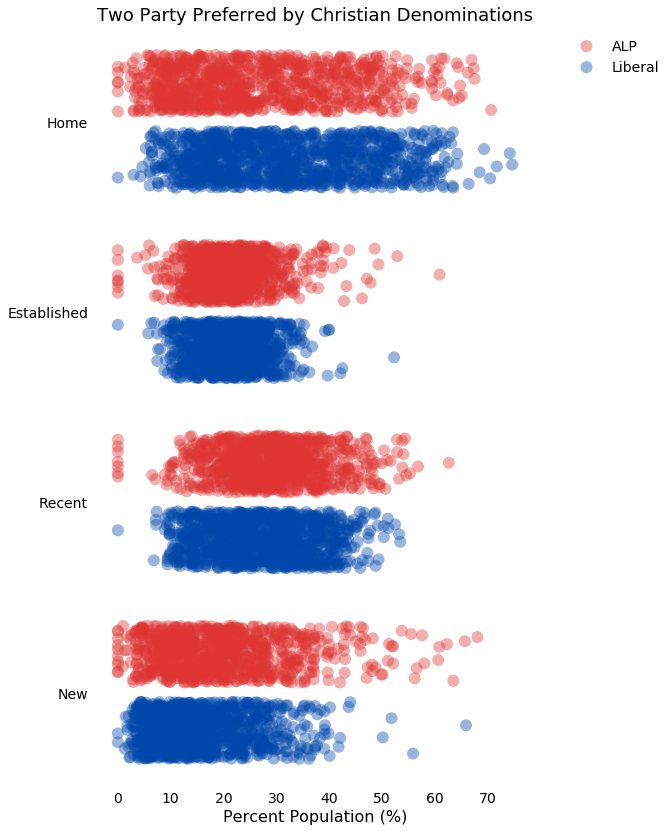

In [22]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,14))

parties = ddf["Preferred Party"].values
group_percent = ddf["Percent"].values*100
group = ddf["group"].values

sns.stripplot(group_percent, group, hue = parties
              ,jitter = 0.3, size = 12, edgecolor = 'none'
              ,alpha = 0.4, palette = colours, dodge = True)

# Add Title
axes.set_title("Two Party Preferred by Christian Denominations", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("ALP", "Liberal"), fontsize = 14, frameon = False, bbox_to_anchor = (1.3, 1))

Text(0, 10, 'Liberal')

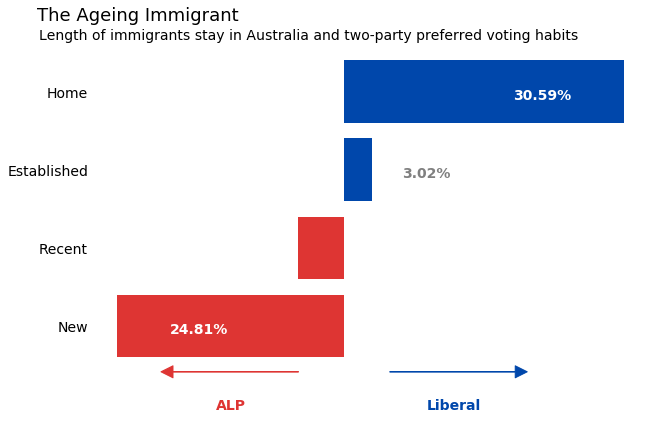

In [69]:
colours = [u"#0047AB", u"#0047AB" ,u"#DE3533", u"#DE3533"]
text_colour = "white"
alt_text_colour = "grey"
width = 0.4

fdf = fdf.sort_values("sort", ascending = True)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))

pop_diff = fdf["Pop Diff Percent"].values
groups = fdf["group"].values
y_pos = np.arange(len(groups))

# Create horizontal bar chart
axes.barh(groups, pop_diff, align = "center", color = colours)

# Add text values to bars
for i, v in enumerate(pop_diff):
    if v < 0:
        axes.text(v + 9, i + .1, str(-1*v) + "%", color = text_colour, ha = "center", fontweight="bold", fontsize = 14)
    elif v < 10:
        axes.text(v + 6, i + .1, str(v) + "%", color = alt_text_colour, ha = "center", fontweight="bold", fontsize = 14)
    else:
        axes.text(v + -9, i + .1, str(v) + "%", color = text_colour, ha = "center", fontweight="bold", fontsize = 14)

# Add Title
axes.set_title("Length of immigrants stay in Australia and two-party preferred voting habits"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position = (0.872,1))
fig.suptitle("The Ageing Immigrant"
               ,fontsize = 18
               ,ma = "left"
               ,ha = "right"
               ,position = (0.329,0.97))

# Add labels to y axis
axes.set_yticklabels(groups)
axes.invert_yaxis()

# Remove tick marks and x axis 
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.annotate("", xy = (20,3.59), xytext= (5,3.59), arrowprops = dict(width = 0.6, color = "#0047AB"))
axes.annotate("", xy = (-20,3.59), xytext= (-5,3.59), arrowprops = dict(width = 0.6, color = "#DE3533"))

# Now let's add your additional information
axes.annotate('ALP',
            xy=(0.25, 0), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color = "#DE3533", fontweight = "bold")
axes.annotate('Liberal',
            xy=(0.65, 0), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color = "#0047AB", fontweight = "bold")